## Task 1: Classification Model Implementation
Problem: Build a classification model (e.g., Logistic Regression or Random Forest) to predict whether an email is spam or non-spam.

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [6]:
# Path to the SpamAssassin dataset (Update this path with the actual directory where you download the dataset)
spam_dir = "C:/Users/iTA/Downloads/20021009_spam.tar.bz2"  # Replace with your directory

# Helper function to load emails
def load_emails(directory):
    emails = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r', encoding='latin1') as file:
            emails.append(file.read())
    return emails



In [13]:
# Load spam and ham (non-spam) emails
spam_emails = load_emails(os.path.join(spam_dir, "C:/Users/iTA/Downloads/20021009_spam/spam"))
ham_emails = load_emails(os.path.join(spam_dir, "C:/Users/iTA/Downloads/20021010_easy_ham (1)/easy_ham"))



In [14]:
# Create a DataFrame
data = pd.DataFrame({
    "text": spam_emails + ham_emails,
    "label": [1] * len(spam_emails) + [0] * len(ham_emails)
})

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["label"], test_size=0.3, random_state=42
)

In [16]:
# Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [17]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.990174672489083
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       751
           1       0.98      0.97      0.97       165

    accuracy                           0.99       916
   macro avg       0.98      0.98      0.98       916
weighted avg       0.99      0.99      0.99       916



C:\Users\iTA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 3: Image Classification
Problem: Classify images of handwritten digits into categories (0-9).
Dataset: MNIST Dataset

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.7926 - loss: 0.6439 - val_accuracy: 0.9793 - val_loss: 0.0708
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9620 - loss: 0.1289 - val_accuracy: 0.9858 - val_loss: 0.0527
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9711 - loss: 0.0938 - val_accuracy: 0.9866 - val_loss: 0.0440
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9769 - loss: 0.0752 - val_accuracy: 0.9877 - val_loss: 0.0405
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9886 - val_loss: 0.0382
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9903 - val_loss: 0.0363
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9889 - val_loss: 0.0363
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.9843 - loss: 0.0470 - 

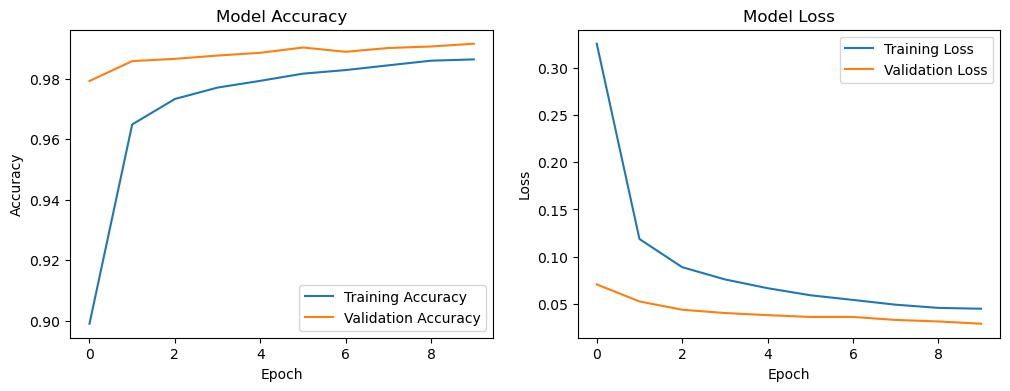

In [33]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Task 4: Clustering and Dimensionality Reduction
Problem: Perform K-means clustering on a dataset (e.g., Iris Dataset or Customer Segmentation).
Then, use PCA to reduce the dimensions and visualize the clusters in a 2D space.

C:\Users\iTA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iTA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


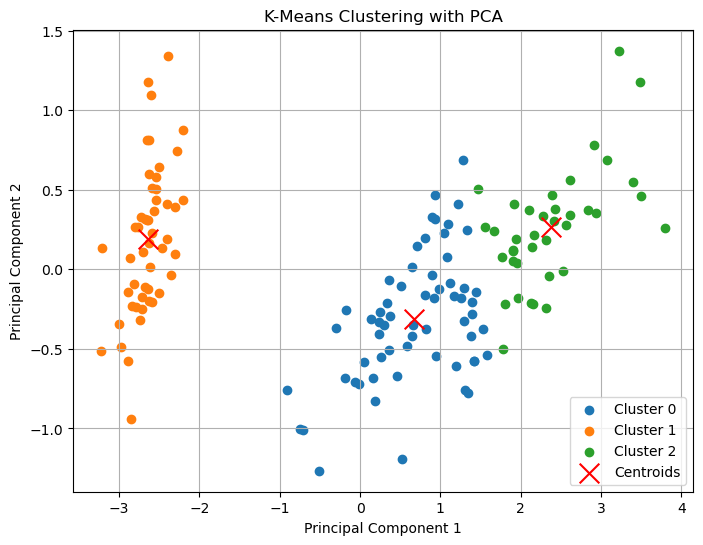

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # True labels (not used in clustering)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in np.unique(kmeans_labels):
    plt.scatter(
        X_pca[kmeans_labels == cluster, 0],
        X_pca[kmeans_labels == cluster, 1],
        label=f"Cluster {cluster}"
    )

# Plot cluster centers in PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c='red', marker='x', s=200, label='Centroids'
)

plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

## Task 5: Object Detection in Traffic
Problem: Detect vehicles, pedestrians, and traffic signs in real-time from a video feed.
Dataset: Open Images Dataset, COCO Dataset

In [2]:
pip install ultralytics opencv-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model
# Ensure you have downloaded the 'yolov8n.pt' model or specify another variant ('yolov8s.pt', 'yolov8m.pt', etc.)
model = YOLO('yolov8n.pt')  # 'n' stands for nano, suitable for real-time applications

# Open the video file or connect to a webcam
video_path = 'traffic_video.mp4'  # Replace with the path to your video file
cap = cv2.VideoCapture(video_path)  # Use 0 for webcam (e.g., cv2.VideoCapture(0))

if not cap.isOpened():
    print("Error: Unable to open video file or camera.")
    exit()

# Read frames and perform detection
while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video stream or failed to read frame.")
        break

    # Perform object detection
    results = model(frame)

    # Plot detections on the frame
    annotated_frame = results[0].plot()

    # Display the frame with detections
    cv2.imshow('Traffic Object Detection', annotated_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Error: Unable to open video file or camera.
End of video stream or failed to read frame.


## Task 6: Fire and Smoke Detection
Problem: Detect fire or smoke in surveillance videos to trigger alerts.
Dataset: Fire Detection Dataset

In [7]:
pip install torch torchvision opencv-python pandas


Note: you may need to restart the kernel to use updated packages.
